# EDAN95 - Applied Machine Learning
### LTH Fall 2019

# Lab 2
### David Larsson & Jonas Lundgren

## Task 1

1)

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

Using code provided or the notebook `Python_introduction` from the first course week.

In [2]:
import matplotlib.pyplot as plt

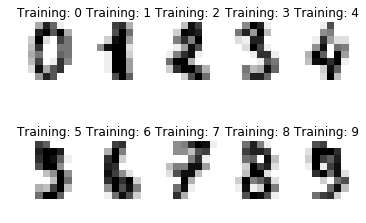

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

2)

In [4]:
num_data = len(digits.data)
num_data

1797

In [5]:
num_split = int(0.7*num_data)
num_split

1257

In [6]:
train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [7]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Using `graphviz` to visualize the tree.

In [10]:
import graphviz
from sklearn.tree import export_graphviz

Save a visualization of the tree as a pdf.

In [11]:
dot_data = export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("digits")

'digits.pdf'

Displaying the tree in the notebook.

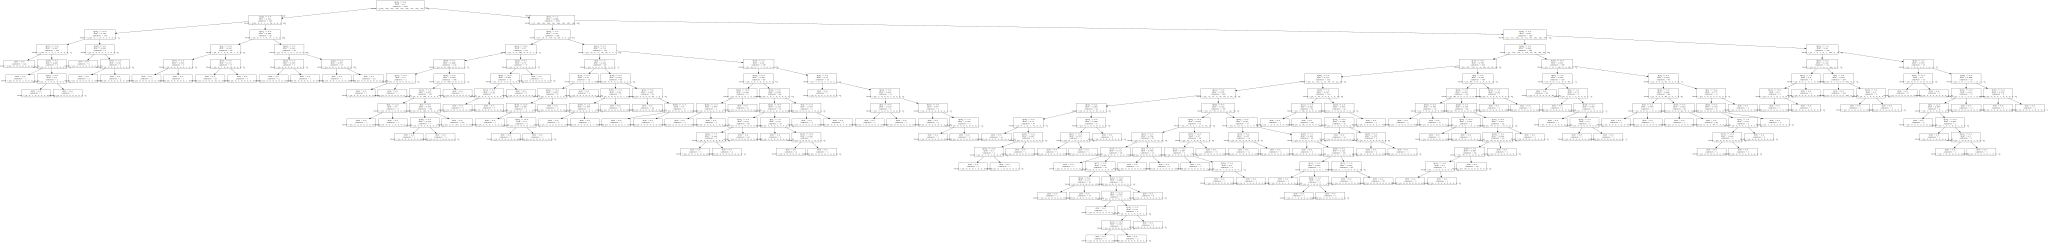

In [12]:
graph = graphviz.Source(dot_data)  
graph 

Easier to get an overview of the whole tree.

In [13]:
from sklearn.tree import plot_tree

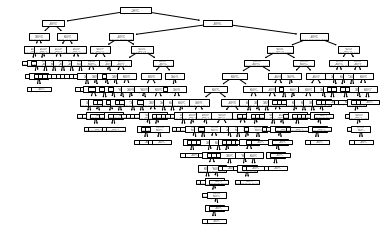

In [14]:
plot_tree(tree_clf);

We see that the tree is wide. We conclude that the algorithm splits the data att some pixel value for each pixel in each image. This results in many splits and thus a wide tree.

4)

In [15]:
predictions = tree_clf.predict(test_features)
predictions

array([4, 0, 5, 3, 6, 9, 6, 6, 7, 0, 0, 4, 7, 6, 8, 2, 2, 5, 7, 9, 5, 4,
       1, 8, 4, 9, 0, 8, 9, 8, 0, 3, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 1, 3,
       0, 5, 6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       4, 9, 8, 9, 8, 0, 1, 7, 7, 3, 5, 1, 0, 0, 2, 9, 7, 8, 3, 0, 5, 3,
       6, 3, 3, 7, 2, 3, 0, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 4,
       1, 7, 5, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 6, 3, 1, 4, 0,
       5, 3, 9, 9, 6, 1, 7, 5, 6, 4, 7, 3, 8, 2, 2, 6, 9, 3, 5, 4, 8, 8,
       0, 4, 9, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 2, 3, 4, 5, 9, 7,
       7, 9, 0, 1, 2, 3, 4, 3, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 8, 0, 9, 8, 9, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 3, 5, 0, 9, 5, 2, 8, 2, 0, 0, 3, 7, 6, 3,
       2, 7, 7, 4, 6, 3, 1, 3, 9, 9, 7, 6, 2, 4, 3, 9, 4, 0, 5, 3, 6, 9,
       6, 9, 7, 5, 4, 4, 7, 2, 7, 2, 8, 5, 7, 9, 5, 4, 8, 9, 4, 0, 0, 8,
       5, 7, 0, 1, 2, 3, 4, 5, 4, 7, 1, 9, 9, 1, 2,

In [16]:
from sklearn import metrics

In [17]:
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.81      0.72      0.76        53
           2       0.85      0.64      0.73        53
           3       0.71      0.68      0.69        53
           4       0.83      0.79      0.81        57
           5       0.83      0.86      0.84        56
           6       0.84      0.87      0.85        54
           7       0.83      0.98      0.90        54
           8       0.67      0.62      0.64        52
           9       0.66      0.80      0.72        55

    accuracy                           0.78       540
   macro avg       0.78      0.78      0.78       540
weighted avg       0.78      0.78      0.78       540

Confusion Matrix: 
[[45  0  0  0  3  0  0  0  1  4]
 [ 0 38  0  3  0  1  1  2  3  5]
 [ 2  1 34  5  1  0  2  0  7  1]
 [ 0  1  4 36  0  3  0  1  4  4]
 [ 5  0  0  0 45  0  2  4  0  1]
 [ 2  0  0  1  0 48  4  0  1  0]


We see that the model has the highest score (precision, recall and f1) for predictin 7's. Lowest precision for 9's and lowest recall and f1 for 8's. In the confistion matrix we see that only 2 of the 7's are missclassified, 1 as a 4 and 1 as a 9. Comparing to the 8's that has many missclassifications. We also observe in the confusion matrix that many 9 predictions were made that were not 9's.

5)

Setting the `min_samples_split` = 10

In [18]:
tree_clf = DecisionTreeClassifier(min_samples_split = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

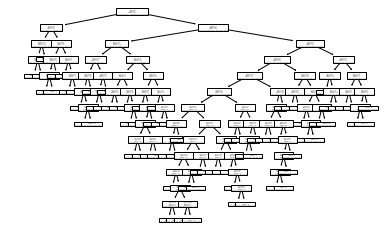

In [19]:
plot_tree(tree_clf);

In [20]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.65      0.74      0.69        53
           2       0.67      0.74      0.70        53
           3       0.75      0.72      0.73        53
           4       0.79      0.79      0.79        57
           5       0.94      0.84      0.89        56
           6       0.87      0.83      0.85        54
           7       0.88      0.91      0.89        54
           8       0.83      0.58      0.68        52
           9       0.71      0.82      0.76        55

    accuracy                           0.78       540
   macro avg       0.79      0.78      0.78       540
weighted avg       0.79      0.78      0.78       540

Confusion Matrix: 
[[46  0  6  0  0  0  0  0  1  0]
 [ 0 39  3  1  0  0  1  1  0  8]
 [ 2  3 39  4  1  0  2  1  1  0]
 [ 0  1  4 38  0  3  0  1  2  4]
 [ 6  0  1  0 45  0  2  2  0  1]
 [ 2  1  1  1  2 47  2  0  0  0]


Much smaller tree. Decreased the weighted average of the precision, recall and f1-score of the tree slightly.

Setting the `min_samples_leaf` = 10

In [21]:
tree_clf = DecisionTreeClassifier(min_samples_leaf = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

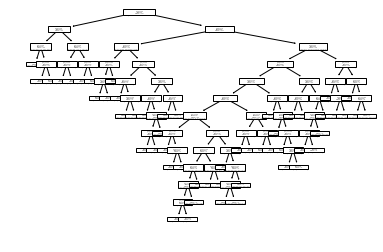

In [22]:
plot_tree(tree_clf);

In [23]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.65      0.68      0.67        53
           2       0.92      0.66      0.77        53
           3       0.64      0.66      0.65        53
           4       0.82      0.82      0.82        57
           5       0.80      0.88      0.84        56
           6       0.80      0.76      0.78        54
           7       0.85      0.81      0.83        54
           8       0.60      0.52      0.56        52
           9       0.66      0.85      0.75        55

    accuracy                           0.76       540
   macro avg       0.77      0.76      0.76       540
weighted avg       0.77      0.76      0.76       540

Confusion Matrix: 
[[51  0  0  0  1  0  0  0  1  0]
 [ 0 36  0  1  0  0  3  1  0 12]
 [ 1  1 35  5  2  5  0  1  3  0]
 [ 0  3  1 35  0  3  0  1  5  5]
 [ 0  0  0  0 47  3  2  2  1  2]
 [ 0  1  0  2  0 49  4  0  0  0]


Much smaller tree here aswell. Decreased the weighted average of the precision, recall and f1-score of the tree slightly compared to the non restricted treee.

Setting the `max_leaf_nodes` = 11

In [24]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

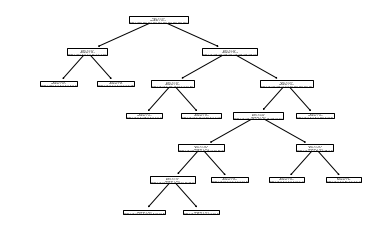

In [25]:
plot_tree(tree_clf);

In [26]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        53
           1       0.68      0.51      0.58        53
           2       0.81      0.57      0.67        53
           3       0.77      0.64      0.70        53
           4       0.86      0.77      0.81        57
           5       0.00      0.00      0.00        56
           6       0.78      0.70      0.74        54
           7       0.86      0.80      0.83        54
           8       0.31      0.54      0.39        52
           9       0.40      0.85      0.55        55

    accuracy                           0.63       540
   macro avg       0.63      0.63      0.62       540
weighted avg       0.63      0.63      0.61       540

Confusion Matrix: 
[[51  0  0  0  1  0  0  0  1  0]
 [ 0 27  0  2  0  0  0  1  9 14]
 [ 2  0 30  6  0  0  4  1 10  0]
 [ 0  1  0 34  0  0  2  0 11  5]
 [ 3  0  0  0 44  0  2  2  6  0]
 [ 3  1  0  0  0  0  0  0 14 38]


/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Tree now only has 10 leaves resulting in a model only able to output either 0,1,2,...,9. Intrestingly the algoritm is not able to make a leaf to predict 6's.